# Regresión simbólica para sistemas de ecuaciones diferenciales

### Enrique Martínez González

Dado un conjunto de puntos de la forma (ti, yi) se desea determinar automáticamente el sistema de ecuaciones diferenciales ordinarias que mejor describe el conjunto de datos y que además, sea lineal en los parámetros. Qué significa que la ecuación diferencial sea lineal en los parámetros y que mejor describa los datos?

Que el sistema sea lineal en los parámetros significa que cada componente de la parte derecha de la ecuación diferencial es una función de la forma:

    f_j(t,y) = a1 * g1(t,y) + a2 * g2(t,y) + …  + an * gn(t,y)

donde los ai son parámetros y todas las funciones gi(t,y) son funciones que dependen de la variable t, de la variable y, pero no dependen de ningún parámetro.  Un ejemplo de sistema que cumple esta características es el sistema SIR:

    S’ = - a*I*S
    I’ = a*I*S - b*I
    R’ = b*I

En este caso, se tiene que la función

    f_S (t,S,I,R) = a1 * g_s1 (t,S,I,R)

donde:

    g_s1(t,S,I,R) = -I*S.

La parte de derecha de la segunda ecuación (I’ = a\*I\*S - b*I) sería:

    f_I (t,S,I,R) = b1 * g_I1 (t,S,I,R) + b2 * g_I2 (t,S,I,R)

donde:
    
    g_I1(t,S,I,R) = I*S, y g_I2(t,S,I,R) = -I.

La parte de derecha de la tercera ecuación (R’ = b*I) sería:

    f_R (t,S,I,R) = b1 * g_R1 (t,S,I,R)

donde:
    
    g_R1(t,S,I,R) = I.

En este caso, se cumple además, que algunos de los parámetros presentes en varias de las ecuaciones son los mismos, pero eso no es un requisito para que sea lineal con respecto a las parámetros.

Este sistema SIR se puede ver gráficamente como:

![alt text](sir_model.png "Title")

y este indica en una población con una enfermedad, como se va desplzando la cantidad de susceptibles, infectados y recuperados a lo largo del tiempo.


Dado un conjunto de puntos de la forma (ti, yi) y un sistema de ecuaciones diferenciales y’ = f(t,y), se puede tener un indicador de cuán bien ese sistema describe esos datos.

Si decimos que y(ti) es la solución de la ecuación diferencial evaluada en el punto ti, entonces un indicador de cuán bien ese sistema describe los datos pudiera ser el valor L:

    L = (y(t1) - y1)^2 + (y(t2) - y2)^2 + …  + (y(tn) - yn)^2

Esto es una suma de cuadrados, que se puede escribir con una sumatoria, aunque se expresa la versión explícita.

Cuando se usa un valor como L en el que se considera la suma de cuadrados de las diferencias, se dice que estamos en presencia de un problema de mínimos cuadrados, porque lo que se quiere es minimizar esa suma de cuadrados.

Entonces, buscar el sistema de ecuaciones diferenciales que mejor describe los datos, se reduce a buscar el sistema de ecuaciones diferenciales que haga que el valor de L (la suma de cuadrados) sea lo más pequeño posible.

Pero, aquí no interesa cualquier sistema de ecuaciones diferenciales: interesa los que sean lineales con respecto a los parámetros

Este sistema de ecuaciones diferenciales deseado se vería gráficamente como un sistema que solapa al original:

![alt text](sir_model_wanted.png "Title")

De manera natural se necesitan datos correspondientes a un sistema de ecuaciones diferenciales para encontrar el sistema que los describe.

Para esto vamos a generar los datos de un modelo que ya conocemos para así comparar si el modelo obtenido por el algoritmo coincide con el original, tomaremos el modelo poblacional SIR:

    S’ = - a*I*S
    I’ = a*I*S - b*I
    R’ = b*I

Escribamos una función en python que describa este modelo:

In [1]:
# modelo del SIR
def sir_dx(X, t, a, b):
    S = X[0]
    I = X[1]
    R = X[2]

    return [-a * I * S, a * I * S - b * I, b * I]

Se recibe el tiempo dentro de la función aunque no se utilice porque estamos haciendo este ejemplo para que sea lo más abarcador y genérico posible, además resaltar que a pesar de que las EDOS normalmente se representan como f(t,y), las librerías que estamos usando de python nos piden que se coloquen de la forma utilizada en el código. 

La función de la parte derecha de la ecuación diferencial recibe también los parámetros a y b, para poder resolver la EDO para distintos valores de los parámetros. En este modelo los valores de a y b son parámetros que indican la cantidad de personas que pasan de estar saludables a infectados y de infectados a recuperados, respectivamente.

Para generar los datos debemos tener un punto inicial, o sea. Un cantidad de saludables, infectados y recuperados iniciales, además debemos conocer cuánto tiempo deseamos en los datos de entrenamiento, además de la cantidad de muestras que se le pasarán al algoritmo. Estos valores se definen en los parámetros X0, a y b.

In [19]:
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt

def integrate_sir(time, samples, X0, a, b):
    t = np.linspace(0, time, samples)

    X, _ = integrate.odeint(sir_dx, X0, t, (a, b), full_output=True)

    S, I, R = X.T

    return (t, S, I, R)

# valores de los parámtros del modelo SIR
a = 0.3
b = 0.4

# punto inicial
X0 = [0.7, 0.3, 0]

# tiempo en el que se generarán los casos de entrenamiento
time = 20

# cantidad de muestras
n = 10000

# datos de entrenamiento
t, S, I, R = integrate_sir(time, n, X0, a, b)

La representación gráfica de estos datos es la misma mostrada con anterioridad.

Para encontrar el sistema que mejor describe el conjunto de datos utilizaremos regresión simbólica que es un tipo de regresión que busca dentro de un espacio de expresiones matemáticas el modelo que mejor se ajuste a un conjunto de datos dados. En esta ningún modelo en particular es utilizado en el comienzo, en su lugar se generan expresiones que se forman de manera aleatoria combinando operaciones matemáticas, funciones analíticas, constantes y variables. Normalmente la regresión simbólica para funciones matemáticas es atacado con una variedad de métodos, uno de ellos es la recombinación de ecuaciones usando algoritmos evolutivos y uno de estos puede ser un algoritmo genético.

En ciencias de la computación un algoritmo genético es una metaheurística inspirada en el proceso natural de selección. Estos usualmente son utilizados para generar soluciones de alta calidad en problemas de optimización y búsqueda haciendo uso de los conocimientos de la biología, utilizando las acciones de mutación, cruzamiento y selección para modificar una población de individuos con el objetivo de obtener la solución deseada.

Es esta metaeurística la que utilizaremos para encontrar el sistema de ecuaciones que mejor se aproxima al conjunto de datos. Teniendo como entrada el conjunto de muestras obtenidas del fenómeno analizado y obteniendo un sistema de ecuaciones diferenciales.

En las variables se encuentran 10000 muestras, aunque normalmente en una situación de la vida real, no se tendrían tantos datos, y se desea simular los resultados del algoritmo ante una situación del mundo real, por esta razón se realiza el ejemplo con solo 200 muestras.

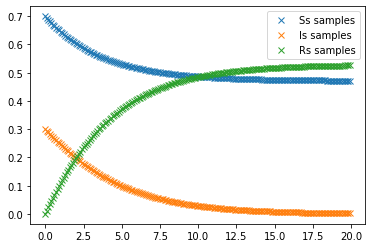

In [4]:
from src.utils import take_n_samples_regular

samples = 200

ts = take_n_samples_regular(samples, t)
Ss = take_n_samples_regular(samples, S)
Is = take_n_samples_regular(samples, I)
Rs = take_n_samples_regular(samples, R)

plt.plot(ts, Ss, 'x', label="Ss samples")
plt.plot(ts, Is, 'x', label="Is samples")
plt.plot(ts, Rs, 'x', label="Rs samples")
plt.legend()
plt.show()

La entrada de los datos al algoritmo debe ser de una forma "especial", en vez de ser un conjuno de listas como tenemos ahora mismo, debe ser una sola y única lista con los puntos (t, y), y una sola y única lista con los puntos f'(t, y).

La datos de la lista que contiene (t, y) son diccionarios, en donde las llaves son los nombres de las variables y los valores son los valores de esas variables en cada uno de los datos. Mientras que los datos de la lista de que contiene a f'(t, y) es una lista de listas con las evaluaciones de cada una de las ecuaciones.

Ejemplo de esto se puede poner que si tenemos los siguientes datos del modelo SIR:

    f_S(0, 1, 2, 3) = 4
    f_I(0, 1, 2, 3) = 5
    f_R(0, 1, 2, 3) = 6

    f_S(5, 6, 7, 8) = 9
    f_I(5, 6, 7, 8) = 10
    f_R(5, 6, 7, 8) = 11

Tendrímos en las variables anteriores:

    T = [0, 5]
    S = [1, 6]
    I = [2, 7]
    R = [3, 8]

entonces la primera lista sería de la forma:

    [
        {
            't': 0,
            'S': 1,
            'I': 2,
            'R': 3
        },
        {
            't': 5,
            'S': 6,
            'I': 7,
            'R': 8
        }
    ]

y la segunda lista que contiene las evaluaciones sería de la forma:

    [[4, 5, 6], [9, 10, 11]]

In [5]:
X_samples = [
        {"t": ts[i], "S": Ss[i], "I": Is[i], "R": Rs[i]} for i in range(len(ts))
    ]

ode = [sir_dx([Ss[i], Is[i], Rs[i]], ts[i], a, b) for i in range(len(ts))]

Con los datos listos podemos llamar a la función que se encarga de la regresión simbólica, y esta realizará todos los cálculos.

In [25]:
from src.symbolic_regression import symbolic_regression

results = symbolic_regression(
        X_samples,
        ode,
        seed_g=0,
        POP_SIZE=100,
        FEATURES_NAMES=[["S", "I"], ["S", "I"], ["I"]],
        MUTATION_SIZE=50,
        XOVER_SIZE=50,
        MAX_DEPTH=5,
        REG_STRENGTH=20,
        verbose=False,
    )

best_system = results["system"]

Como podemos ver la función recibe varios parámetros, más de los que se están utilizando en este ejemplo, pero solamente dos de estos son obligarorios, estos son las muestras (t, y) y las evaluaciones de f(t, y).

El resto de parámetros se utilizan para ajustar distintas características del algoritmo:

- MAX_GENERATIONS: cantidad de generaciones máximas que se desean realizar
- POP_SIZE: cantidad de individuos que debe poseer cada generación
- FEATURES_NAMES: lista de listas de las variables que pueden ser colocadas en cada ecuación del sistema, en caso de que este parámetro no sea introducido indica que pueden ser colocadas todas las variables en todas las ecuaciones del sistema.
- VARIABLE_PROBABILITY: la probabilidad de colocar una variable como resultado de la mutación
- CHANGE_OPERATION_PROBABILITY: la probabilidad de modificar una operación como resultado de la mutación
- DELETE_NODE_PROBABILITY: la probabilidad de borrar un nodo como resultado de la mutación
- ADD_OPERATION_PROBABILITY: la probabilidad de añadir una operación como resultado de la mutación
- XOVER_SIZE: cantidad de sistemas que se desean obtener como resultado de cruzamientos
- MUTATION_SIZE: cantidad de sistemas que se desean mutar
- REG_STRENGTH: cantidad de nodos que posee el sistema a partir del cual el fitness del sistema se comienza a penalizar
- EPSILON: cantidad de acercamiento mínimo que puede tener el mejor individuo de una generación para detener el algoritmo
- ROUND_SIZE: cantidad de cifras a las cuales se desea redondear
- verbose: booleano que indica si se desean imprimir múltiples informaciones a lo largo de la ejecución del algoritmo

La razón por la que existen estos parámetros es para poder realizar una mejor búsqueda si se conoce algún dato acerca del sistema de EDOS deseado. Por ejemplo el parámetro FEATURES_NAMES permite indicar que variables no deben aparecer en una ecuación en específica al dejar de introducirlos en la lista correspondiente a esa ecuación. Estas variables deben poseer los mismos nombres con que aparecen en los diccionarios de las muestras de entrada. Esto acelera en gran medida encontrar el sistema pues es una disminución en el espacio de búsqueda notable. Otros parámetros como MAX_GENERATIONS y POP_SIZE influyen directamente en el tiempo de búsqueda al permitir modificar la cantidad de generaciones y aumentar o disminuir la cantidad de individuos en la población.

Como resultado de la ejecución del algoritmo obtenemos un diccionario que posee todas los datos de los parámetros utilizados durante la ejecución de la función además de:

- time: tiempo que tomó la ejecución
- score: puntuación obtenida por el mejor sistema alcanzado
- generations: cantidad de generaciones que tuvieron lugar
- system: nodo que representa el sistema que mejor acercamiento tuvo al conjunto de datos de entrada
- system_representation: representación del system (este dato es un string con la representación del sistema)

In [26]:
from pprint import pprint
from copy import deepcopy

mini_result = deepcopy(results)

#se elimina X y target porque contienen todas los muestras
mini_result.pop('X')
mini_result.pop('target')

#se elimina system porque es el diccionario que almacena el
#sistema obtenido por el algoritmo
mini_result.pop('system')

pprint(mini_result)

{'ADD_OPERATION_PROBABILITY': 0.4,
 'CHANGE_OPERATION_PROBABILITY': 0.3,
 'DELETE_NODE_PROBABILITY': 0.3,
 'EPSILON': 1e-07,
 'FEATURES_NAMES': [['S', 'I'], ['S', 'I'], ['I']],
 'MAX_DEPTH': 5,
 'MAX_GENERATIONS': 100,
 'MUTATION_SIZE': 50,
 'POP_SIZE': 100,
 'REG_STRENGTH': 20,
 'ROUND_SIZE': 5,
 'VARIABLE_PROBABILITY': 0.3,
 'XOVER_SIZE': 50,
 'generations': 2,
 'score': 2.2163614738978414e-07,
 'seed_g': 0,
 'system_representation': '1 : -0.3 * (I * S) \n'
                          '2 : -0.4 * I + 0.3 * (I * S) \n'
                          '3 : 0.13333 * I + 0.13333 * I + 0.13333 * I \n',
 'time': 1.98670705800032}



En system se guarda el sistema de ecuaciones que encontró el algoritmo, este es un diccionario con una estructura específica, no una función. Si evaluamos este sistema en los datos podremos ver que tan parecido es con respecto a los datos originales. Para realizar esta evaluación debemos utilizar el método evaluate que recibe un punto (t, y) en forma de diccionario, sustituye las variables en el sistema y evalúa este obteniendo el f'(t, y) correspondiente.


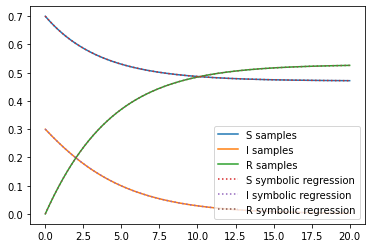

In [28]:
from src.utils import evaluate

integrate_gp = lambda X, t: evaluate(
        best_system, {"t": t, "S": X[0], "I": X[1], "R": X[2]}
    )

SIR_gp, infodict = integrate.odeint(integrate_gp, X0, t, full_output=True)

S_gp, I_gp, R_gp = SIR_gp.T

plt.plot(t, S, label="S samples")
plt.plot(t, I, label="I samples")
plt.plot(t, R, label="R samples")
plt.plot(t, S_gp, ':',label="S symbolic regression")
plt.plot(t, I_gp, ':',label="I symbolic regression")
plt.plot(t, R_gp, ':',label="R symbolic regression")
plt.legend()
plt.show()

Graficamente se puede ver que los dos sistemas son muy parecidos. Como se veía con anterioridad dentro de results también se encuentra la representación del sistema, que utilizaremos para ver en realidad cuán cercano se encuentra el sistema resultante del algoritmo.

In [12]:
print(results["system_representation"])

1 : -0.3 * (I * S) 
2 : -0.4 * I + 0.3 * (I * S) 
3 : 0.13333 * I + 0.13333 * I + 0.13333 * I 



La última ecuación en realidad es la misma del modelo original a pesar de estar dividida en un suma de 3 términos.

Entonces, ya viendo que funciona (al menos en este ejemplo tan sencillito), vale la pena ver que lo que está pasando dentro de la función symbolic_regression.

Vemos que recibimos un número grande de parámetros que explicaremos mientras se vayan usando para entender mejor.

Luego se incia el temporizador que será utilizado para comprobar cuánto tiempo tomó la ejecución de todo el algoritmo. Se inicializa la semilla que se utilizará en los "randoms" de la ejecución.

En features_names se almacenan los nombres de las variables que pueden aparecer en cada ecuación del sistema, o sea una una lista de listas en caso de que se pase en los parámetros, en caso de que este no se envíe pues se utilizan todos los parámetros en todas las ecuaciones. Esto es fundamentalmente para ser utilizado si conocemos información del sistema que se desea encontrar.

En operations se guardan las operaciones que pueden aparecer dentro de las ecuaciones del sistema.

A continuación se crea la población inicial del algoritmo genérico. Para esto se utiliza la función random_system que crea sistemas de ecuaciones aleatorios utilizando las variables en cada ecuación definidas anteriormente, junto con las operaciones, además se hace uso del parámetro MAX_DEPTH para controlar la profundidad que pueden tener estos árboles. La población inicial generada contiene POP_SIZE individuos.

Entonces inciamos las generaciones. Definida la máxima cantidad que pueden ocurrir de estas por el parámtro MAX_GENERATIONS.

Dentro de cada generación se toma una cantidad de individuos igual a MUTATION_SIZE para ser mutados, resaltar que no es que se muten estos encima del mismo sistema, si no que se crea otro con el resultado de la mutación. Estos individuos mutados son guardados en mutations_populations.

Lo que hizo esta función fue seleccionar aleatoriamente individuos de la población y aplicar la función mutate_system sobre ellos. Esta función selecciona un nodo aleatorio dentro del árbol representante del sistema y editar alguna de sus carácterísticas. Estas mutaciones pueden ir desde eliminar un subárbol a sencillamente cambiar la operación en un nodo.

Luego se realiza un proceso similar pero esta vez en vez de mutar a individuos, se cruzan entre ellos. Se cruzan una cantidad de 2 * XOVER_SIZE, para obtener un total de XOVER_SIZE individuos resultantes de cruzamientos. La función xover lo que hace es tomar dos sistemas de ecuaciones y devolver uno nuevo con características en común de ambos padres.

Entonces podemos generar una nueva población que contiene a la población incial, los individuos mutados y los individuos resultantes de los cruzamientos. Esta nueva población es guardada en total_population.

De estos sistemas no conocemos mucho, y necesitamos filtrarlos para quedarnos con una cantidad igual a la población inicial, además de ver que tan bueno fue el mejor de la población generada.

Para esto se recorren todos los individuos optimizando sus parámetros para que se ajusten al conjunto de datos. Esto se hace llamando a la función lineal_optimization_system que esta genera un sistema de ecuaciones lineales por cada una de las ecuaciones del sistema optimizando los parámetros y asignándolos en el sistema. Una vez los parámetros han sido ajustados se evalua la calidad del sistema con la función compute_fitness, que esta compara los resultados obtenidos en las evaluaciones del sistema y los resultados objetivos. Mientras este resultado sea lo más cercano a 0, quiere decir que la diferencia entre los resultados es cada menor, por lo tanto es mejor.

Si en algún momento el resultado obtenido es menor que un EPSILON definido en los parámetros se detiene la ejecución. Si esto no ocurre pues pasan a la siguiente generación los individuos que mejor puntuación obtuvieron, una cantidad de estos igual a POP_SIZE.

Antes de retornar finalmente el sistema obtenido, se redondean los parámetros y se filtran aquellos que son 0 para "embellecer" el sistema



